## Nama: Favian Harya Nandana Adrian

# Load Library

In [ ]:
pip install newspaper3k

In [ ]:
pip install Sastrawi

In [ ]:
from newspaper import Article
import pandas as pd
import numpy as np
import nltk
import re
from nltk.tokenize import word_tokenize
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.metrics import classification_report,accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
nltk.download('punkt')
nltk.download('stopwords')

pd.set_option('display.max_colwidth', -1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-40-38f0989b1f92>:24: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


Hal yang pertama yang saya lakukan adalah melakukan memasukan library-library yang saya perlukan untuk mengerjakan UTS ini.



# Scrapping the article

Saya melakukan scrapping menggunakan ```from newspaper import Article``` untuk mengambil artikel dari beberapa website berita, yaitu:
* liputan6.com
* kompas.com
* cnnindonesia.com

Pada UTS ini, saya memutuskan untuk mengambil 10 artikel dari setiap website berita tersebut. Dimana, pada setiap website berita, saya mengambil tiga jenis artikel untuk UTS ini, yaitu:
* politik
* olahraga
* hiburan

Setiap jenis artikel, saya ambil dari beda website berita, seperti liputan6.com untuk artikel politik, kompas.com untuk berita olahraga, serta cnnindonesia.com untuk berita hiburan.

In [ ]:
urls = [
    "https://www.liputan6.com/pemilu/read/5444419/pdip-terus-bergerak-ganjar-mahfud-kita-hadapi-prabowo-gibran-yang-cerminkan-neo-orba",
    "https://www.liputan6.com/news/read/5444223/jawaban-kpk-atas-permintaan-supervisi-polisi-terkait-kasus-dugaan-pemerasan-firli-bahuri-ke-syahrul-yasin-limpo4",
    "https://www.liputan6.com/news/read/5444350/jokowi-bantuan-tahap-kedua-untuk-rakyat-palestina-segera-dikirim",
    "https://www.liputan6.com/news/read/5445062/ini-permintaan-bupati-edi-damansyah-agar-partisipasi-pemilu-2024-meningkat-di-daerahnya",
    "https://www.liputan6.com/news/read/5444887/anies-baswedan-bangga-sikap-teguh-pemerintah-indonesia-dukung-kemerdekaan-palestina",
    "https://www.liputan6.com/news/read/5444547/ganjar-pranowo-tekankan-pemerataan-kualitas-dan-kuantitas-di-indonesia-timur",
    "https://www.liputan6.com/news/read/5444453/ppp-usulan-hak-angket-mk-sedang-dikaji-fraksi-di-dpr",
    "https://www.liputan6.com/news/read/5444393/anies-dialog-imajiner-ke-bung-hatta-negara-kondisinya-sedang-tidak-baik-baik-saja",
    "https://www.liputan6.com/news/read/5444212/ganjar-siapa-yang-memecah-pdip-anda-berlawanan-dengan-banteng",
    "https://www.liputan6.com/news/read/5440252/mahfud-md-mkmk-sudah-tahu-apa-yang-harus-diputuskan"
]

data = []
for url in urls:
    response = Article(url)
    response.download()
    response.parse()
    text = response.text
    data.append(text)

df_politik = pd.DataFrame(data)
df_politik = df_politik.rename(columns={0: 'text'})

In [ ]:
constant_value = 'politik'
df_politik['jenis'] = np.full(len(df_politik), constant_value)

In [ ]:
constant_value = 'Liputan6.com'
df_politik['media'] = np.full(len(df_politik), constant_value)

In [ ]:
urls = [
    "https://bola.kompas.com/read/2023/10/14/22000078/casemiro-cedera-saat-bela-brasil-man-united-dilanda-krisis",
    "https://www.kompas.com/badminton/read/2023/10/29/12000078/final-french-open-2023-tekad-fikri-bagas-bayar-kekalahan-di-denmark",
    "https://bola.kompas.com/read/2023/11/04/07300028/prediksi-skor-dan-susunan-pemain-fulham-vs-man-united-di-liga-inggris",
    "https://www.kompas.com/badminton/read/2023/10/30/00002948/hasil-final-french-open-2023-fikri-bagas-runner-up-tumbang-lagi-di",
    "https://bola.kompas.com/read/2023/11/05/13300038/man-city-pesta-6-gol-ketika-guardiola-seperti-melihat-messi-",
    "https://www.kompas.com/badminton/read/2023/10/30/06000098/hasil-french-open-2023--gelar-super-750-pertama-jonatan-fikri-bagas",
    "https://bola.kompas.com/read/2023/11/04/08300078/kata-erik-ten-hag-soal-rashford-pesta-usai-kalah-dari-man-city--tak-bisa",
    "https://www.kompas.com/badminton/read/2023/10/30/08300038/jonatan-juara-french-open-2023--target-tercapai-bungkam-keraguan-",
    "https://bola.kompas.com/read/2023/11/02/09300028/chelsea-ke-perempat-final-piala-liga-inggris-the-blues-rajut-asa-juara",
    "https://www.kompas.com/badminton/read/2023/10/29/23330398/indonesia-masters-ii-2023-lanny-ribka-dan-jafar-aisyah-juara-dua-gelar"
]

data = []
for url in urls:
    response = Article(url)
    response.download()
    response.parse()
    text = response.text
    data.append(text)

df_sport = pd.DataFrame(data)
df_sport = df_sport.rename(columns={0: 'text'})

In [ ]:
constant_value = 'olahraga'
df_sport['jenis'] = np.full(len(df_sport), constant_value)

In [ ]:
constant_value = 'Kompas.com'
df_sport['media'] = np.full(len(df_politik), constant_value)

In [ ]:
urls = [
    "https://www.cnnindonesia.com/hiburan/20231103223722-220-1019876/siasat-tim-gadis-kretek-bangun-pabrik-rokok-dari-nol-di-magelang-ko-apex-memanggilnya-mama",
    "https://www.cnnindonesia.com/hiburan/20231105031734-220-1020088/sinopsis-attack-on-titan-final-season-part-4-akhir-guncangan-bumi",
    "https://www.cnnindonesia.com/hiburan/20231103151031-220-1019684/review-film-tuhan-izinkan-aku-berdosa",
    "https://www.cnnindonesia.com/hiburan/20231102130926-220-1019087/nicolas-cage-akui-proses-syuting-superman-dan-hasil-di-the-flash-beda",
    "https://www.cnnindonesia.com/hiburan/20231103183501-220-1019812/review-film-budi-pekerti",
    "https://www.cnnindonesia.com/hiburan/20231103133223-220-1019592/the-last-of-us-2-direncanakan-mulai-digarap-awal-2024",
    "https://www.cnnindonesia.com/hiburan/20231031224438-220-1018332/noah-ngaku-sempat-ragu-buat-film-barbie-greta-gerwig-turun-tangan",
    "https://www.cnnindonesia.com/hiburan/20231101144012-220-1018672/sinopsis-love-reset-kang-ha-neul-dan-jung-so-min-jadi-pasutri-amnesia",
    "https://www.cnnindonesia.com/hiburan/20231101112526-220-1018527/the-crown-6-janji-gambarkan-kematian-diana-dengan-penuh-hormat",
    "https://www.cnnindonesia.com/hiburan/20231031160749-220-1018187/sutradara-respons-kabar-fight-club-jadi-favorit-incel-dan-sayap-kanan"
]

data = []
for url in urls:
    response = Article(url)
    response.download()
    response.parse()
    text = response.text
    data.append(text)

df_showbiz = pd.DataFrame(data)
df_showbiz = df_showbiz.rename(columns={0: 'text'})

In [ ]:
constant_value = 'hiburan'
df_showbiz['jenis'] = np.full(len(df_showbiz), constant_value)

In [ ]:
constant_value = 'cnnindonesia.com'
df_showbiz['media'] = np.full(len(df_politik), constant_value)

Saya melakukan hal yang sama pada setiap jenis artikel yang saya punya. Hal pertama yang saya lakukan adalah membuat list yang berisi URL dari berita-berita yang saya ingin scraping. Kedua, saya membuat list kosong yang nanti akan diisi dengan article yang telah discrap menggunakan ```Article```. Selanjutnya, setelah list tersebut terisi, saya rubah list tersebut menjadi dataframe dan merubah nama kolomnya menjadi ```text``` (hal ini dilakukan karena default nama kolomnya adalah 0).

Hal yang selanjutnya saya lakukan adalah membuat kolom ```jenis``` dan ```media``` untuk setiap jenis artikel dan website beritanya yang akan saya isi dengan nilai konstan sesuai dengan jenis serta medianya.


# Concat all the dataframe

In [ ]:
df = pd.concat([df_politik, df_sport, df_showbiz], keys=[df_politik, df_sport, df_showbiz], ignore_index=True)
df

,text,jenis,media
0,"Liputan6.com, Jakarta - Partai Demokrasi Indonesia Perjuangan (PDIP) mengajak seluruh parpol pengusung, relawan, dan simpatisan pasangan bakal capres-cawapres Ganjar Pranowo-Mahfud Md untuk bergerak semakin masif menggalang kekuatan.\n\nHal ini diperlukan agar Indonesia dipimpin oleh pemimpin visioner dan mampu menciptakan keadilan bagi semua orang, bukan hanya bagi segelintir atau keluarga tertentu.\n\n“Kemenangan dimulai dari rakyat fokus bergerak di akar rumput. Sebab rakyat semakin cerdas di dalam melihat rekayasa hukum yang terjadi di MK (Mahkamah Konstitusi). Rakyat bereaksi keras atas mobilisasi aparat dengan melakukan penurunan bendera, baliho, dan berbagai atribut dukungan terhadap Ganjar-Mahfud Md,” kata Ketua DPP PDIP, Djarot Saiful Hidayat dalam keterangannya, Sabtu (4/11/2023).\n\nDjarot mengajak semua kader dan parpol pengusung untuk terus bergerak memenangkan pasangan Ganjar-Mahfud dan mengalahkan duet Prabowo Subianto-Gibran Rakabuming Raka.\n\n“Terus bergerak, Ganjar-Mahfud Md pastikan akan terus perkuat demokrasi. Bersama kita hadapi Prabowo-Gibran sebagai cerminkan Neo-Orde Baru Masa Kini,” katanya.\n\nMenurut Djarot, tidak ada tempat di Indonesia bagi ambisi kekuasaan.\n\n“(Karena) cinta terhadap keponakan, lalu MK dikebiri, dan demokrasi pun mati. Kini kekuatan moral lahir kembali. Inilah fondasi terpenting Ganjar-Mahfud MD, kokoh pada moral kebenaran dan berdedikasi total pada rakyat, bangsa, dan negara, bukan pada keluarga,” kata dia.\n\nPDIP, kata Djarot, percaya pada integritas Majelis Kehormatan MK untuk benar-benar obyektif dan mengedepankan sikap kenegarawanan. “Kuatnya gerakan dari para budayawan, cendekiawan, kelompok pro demokrasi, para ahli hukum tata negara hingga pergerakan tokoh-tokoh berintegritas tinggi dari berbagai perguruan tinggi menjadi kekuatan moral yang sangat dahsyat di dalam meluruskan jalannya demokrasi,” katanya memungkasi.",politik,Liputan6.com
1,"Liputan6.com, Jakarta - Komisi Pemberantasan Korupsi (KPK) mengaku akan berdiskusi terlebih dahulu sebelum menjawab permintaan supervisi Polda Metro Jaya terkait kasus pemerasan yang diduga dilakukan oleh Pimpinan KPK Firli Bahuri kepada mantan Menteri Pertanian Syahrul Yasin Limpo.\n\n""Sebelum KPK menentukan perlu tidaknya melakukan supervisi, maka akan dilakukan koordinasi terlebih dahulu,"" kata Kepala Bagian (Kabag) Pemberitaan KPK Ali Fikri dalam keterangannya, Jumat (3/11/2023).\n\nAli Fikri mengatakan, dari informasi yang nantinya diperoleh tersebut selanjutnya dilakukan analisis dan telaah untuk memutuskan.\n\n""Apakah KPK perlu melakukan supervisi terhadap penanganan perkara tersebut atau tidak. Hal ini sebagaimana kewenangan KPK dalam melakukan koordinasi dan supervisi yang diatur dalam Pasal 6, 8, 10, 10A UU Nomor 19 tahun 2019; Perpres 102 tahun 2020 tentang Pelaksanaan Supervisi Pemberantasan Tindak Pidana Korupsi,"" ujar dia.\n\nTerpisah, Direktur Reserse Kriminal Khusus Polda Metro Jaya, Kombes Pol Ade Safri Simanjuntak menerangkan, surat penyidik yang dilayangkan ke pimpinan KPK maupun Dewas terkait dengan permohonan supervisi perkara aquo belum juga medapat respon.\n\n""Sampai saat ini menunggu dari KPK RI,"" ujar dia di Polda Metro Jaya, Jumat.\n\nKendati, Ade memastikan hal ini tak akan mempengaruhi proses penanganan perkara.\n\n""Intinya proses penyidikan akan terus berjalan secara profesional transparan dan akuntabel,"" ujar dia.",politik,Liputan6.com
2,"Liputan6.com, Jakarta - Presiden Joko Widodo atau Jokowi mengatakan pemerintah akan segera mengirimkan bantuan tahap kedua untuk warga Gaza, Palestina. Jokowi menyebut bahwa antusias masyarakat, lembaga swadaya masyarakat (LSM), dan dunia usaha untuk menyalurkan bantuan ke Gaza sangat besar.\n\nMenurut dia, bantuan-bantuan yang terkumpul akan dikoordinir oleh pemerintah agar lebih cepat sampai ke tangan masyarakat Palestina yang membutuhkan. Pasalnya, kata Jokowi, jalur masuk bantuan ke Gaza tidak mudah.\n\n""Ini kita melihat bahwa antusias m

Saya menggabungkan semua jenis artikel yang saya punya dengan ```pd.concat``` untuk membuat dataframe baru berisikan semua data untuk dilakukannya permodelan. Data yang dihasilkan masih merupakan data kotor sehingga masih butuh banyak perlakuan pada data ini.

In [ ]:
df.to_csv('data_uts.csv')

Di sini saya merubah data yang telah saya satukan tadi dengan ```df.to_csv``` serta mendowload-nya. Hal ini saya lakukan untuk berjaga-jaga apabila scraping yang saya lakukan error saat di re-run nantinya. Sehingga apabila scraping-nya error, saya bisa menggunakan datanya kembali.

# Cleansing all the text

Pada fase ini, saya melakukan cleansing pada raw data text yang tadi telah sata scrapping dari website berita. Fase cleansing ini meliputi:
 * Menghilangkan beberapa kata yang mengganggu.
 * Menghilangkan tanda baca, karakter, angka, dan spasi ekstra.
 * Menghilangkan stopwords (ex: 'dan', 'atau', dan 'sebuah').
 * Melakukan stemming.
 * Melakukan lowercasing.

Hal-hal tersebut agar data dapat saya olah dengan baik, sehingga dapat meningkatkan akurasi dan efektivitas model yang saya buat nantinya. Hal ini dikarenakan tanda tanda baca, karakter, angka, dan spasi ekstra tidak memiliki arti yang relevan, dengan menghilangkan hal-hal tersebut model dapat fokus pada informasi yang penting. Hal ini berlaku dengan stopwords juga, dimana stopwords tidak memiliki informasi yang bisa dimanfaatkan oleh model. Lalu, dengan melakukan stemming, model yang saya buat akan lebih mudah untuk mengenali hubungan antara kata-kata yang berasal dari akar yang sama. Lowercasing juga sama pentingnya dengan yang lain, dengan lowercasing dapat menciptakan data yang konsisten, hal ini karena setiap teks memiliki format yang seragam.





## Removing Spesifics Words & Texts

In [ ]:
def text_remove(df):
  df = df.str.replace('\n\n', ' ')
  df = df.str.replace('com', '')
  df = df.str.replace('Liputan6', '')
  df = df.str.replace('KOMPAS', '')
  df = df.str.replace('https', '')
  df = df.str.replace('ADVERTISEMENT SCROLL TO CONTINUE WITH CONTENT', '')
  df = df.str.replace('Baca juga', '')
  df = df.str.replace('Gambas', '')
  df = df.str.replace('CNN', '')

  return df

df['text']= text_remove(df['text'])

In [ ]:
df

,text,jenis,media
0,"., Jakarta - Partai Demokrasi Indonesia Perjuangan (PDIP) mengajak seluruh parpol pengusung, relawan, dan simpatisan pasangan bakal capres-cawapres Ganjar Pranowo-Mahfud Md untuk bergerak semakin masif menggalang kekuatan. Hal ini diperlukan agar Indonesia dipimpin oleh pemimpin visioner dan mampu menciptakan keadilan bagi semua orang, bukan hanya bagi segelintir atau keluarga tertentu. “Kemenangan dimulai dari rakyat fokus bergerak di akar rumput. Sebab rakyat semakin cerdas di dalam melihat rekayasa hukum yang terjadi di MK (Mahkamah Konstitusi). Rakyat bereaksi keras atas mobilisasi aparat dengan melakukan penurunan bendera, baliho, dan berbagai atribut dukungan terhadap Ganjar-Mahfud Md,” kata Ketua DPP PDIP, Djarot Saiful Hidayat dalam keterangannya, Sabtu (4/11/2023). Djarot mengajak semua kader dan parpol pengusung untuk terus bergerak memenangkan pasangan Ganjar-Mahfud dan mengalahkan duet Prabowo Subianto-Gibran Rakabuming Raka. “Terus bergerak, Ganjar-Mahfud Md pastikan akan terus perkuat demokrasi. Bersama kita hadapi Prabowo-Gibran sebagai cerminkan Neo-Orde Baru Masa Kini,” katanya. Menurut Djarot, tidak ada tempat di Indonesia bagi ambisi kekuasaan. “(Karena) cinta terhadap keponakan, lalu MK dikebiri, dan demokrasi pun mati. Kini kekuatan moral lahir kembali. Inilah fondasi terpenting Ganjar-Mahfud MD, kokoh pada moral kebenaran dan berdedikasi total pada rakyat, bangsa, dan negara, bukan pada keluarga,” kata dia. PDIP, kata Djarot, percaya pada integritas Majelis Kehormatan MK untuk benar-benar obyektif dan mengedepankan sikap kenegarawanan. “Kuatnya gerakan dari para budayawan, cendekiawan, kelompok pro demokrasi, para ahli hukum tata negara hingga pergerakan tokoh-tokoh berintegritas tinggi dari berbagai perguruan tinggi menjadi kekuatan moral yang sangat dahsyat di dalam meluruskan jalannya demokrasi,” katanya memungkasi.",politik,Liputan6.com
1,"., Jakarta - Komisi Pemberantasan Korupsi (KPK) mengaku akan berdiskusi terlebih dahulu sebelum menjawab permintaan supervisi Polda Metro Jaya terkait kasus pemerasan yang diduga dilakukan oleh Pimpinan KPK Firli Bahuri kepada mantan Menteri Pertanian Syahrul Yasin Limpo. ""Sebelum KPK menentukan perlu tidaknya melakukan supervisi, maka akan dilakukan koordinasi terlebih dahulu,"" kata Kepala Bagian (Kabag) Pemberitaan KPK Ali Fikri dalam keterangannya, Jumat (3/11/2023). Ali Fikri mengatakan, dari informasi yang nantinya diperoleh tersebut selanjutnya dilakukan analisis dan telaah untuk memutuskan. ""Apakah KPK perlu melakukan supervisi terhadap penanganan perkara tersebut atau tidak. Hal ini sebagaimana kewenangan KPK dalam melakukan koordinasi dan supervisi yang diatur dalam Pasal 6, 8, 10, 10A UU Nomor 19 tahun 2019; Perpres 102 tahun 2020 tentang Pelaksanaan Supervisi Pemberantasan Tindak Pidana Korupsi,"" ujar dia. Terpisah, Direktur Reserse Kriminal Khusus Polda Metro Jaya, Kombes Pol Ade Safri Simanjuntak menerangkan, surat penyidik yang dilayangkan ke pimpinan KPK maupun Dewas terkait dengan permohonan supervisi perkara aquo belum juga medapat respon. ""Sampai saat ini menunggu dari KPK RI,"" ujar dia di Polda Metro Jaya, Jumat. Kendati, Ade memastikan hal ini tak akan mempengaruhi proses penanganan perkara. ""Intinya proses penyidikan akan terus berjalan secara profesional transparan dan akuntabel,"" ujar dia.",politik,Liputan6.com
2,"., Jakarta - Presiden Joko Widodo atau Jokowi mengatakan pemerintah akan segera mengirimkan bantuan tahap kedua untuk warga Gaza, Palestina. Jokowi menyebut bahwa antusias masyarakat, lembaga swadaya masyarakat (LSM), dan dunia usaha untuk menyalurkan bantuan ke Gaza sangat besar. Menurut dia, bantuan-bantuan yang terkumpul akan dikoordinir oleh pemerintah agar lebih cepat sampai ke tangan masyarakat Palestina yang membutuhkan. Pasalnya, kata Jokowi, jalur masuk bantuan ke Gaza tidak mudah. ""Ini kita melihat bahwa antusias masyarakat lembaga swadaya masyarakat, dunia usaha ini banyak sekali yang ingin me

Di sini saya membuat function bernama ```text_remove()``` untuk menghilangkan kata-kata serta kalimat yang saya tidak butuhkan secara spesifik seperti '**\n\n**', '**com**', '**KOMPAS**', '**https**', '**Baca** **juga**', dan '**ADVERTISEMENT** **SCROLL** **TO** **CONTINUE** **WITH** **CONTENT**'. Pada function tersebut berisikan function ```replace()```, dimana function ```replace()``` ini merubahkan kata atau kalimat spesifik tersebut menjadi spasi.

## Removing Characters, Numbers, Extra Spaces, and Lowercasing

In [ ]:
def cleansing(df):

  df_clean = df.str.lower()
  df_clean = [re.sub(r'[^\w]', ' ', i) for i in df_clean]
  df_clean=[re.sub(r"\d+","",i )for i in df_clean]
  df_clean = [re.sub(r'\s+', ' ', i) for i in df_clean]

  return df_clean

In [ ]:
df['clean text'] = cleansing(df['text'])

Saya membuat function bernama ```cleansing()```, dimana function ini berguna untuk menghilangkan tanda baca, karakter, angka, spasi ekstra serta untuk lowercasing. Untuk menghilangkan hal-hal tersebut, saya menggunakan ```re.sub()``` yang akan dilooping sebanyak data yang saya gunakan, dimana isinya menyesuaikan hal apa yang saya ingin hilangkan, berikut fungsi setiap isi ```re.sub()``` yang saya gunakan:
 *  ```re.sub(r'[^\w]', ' ')``` untuk mengganti semua karakter yang bukan huruf dengan spasi.
 * ```re.sub(r"\d+","")``` untuk mengganti semua angka menjadi spasi.
 * ```re.sub(r'\s+', ' ')``` untuk mengganti semua spasi ekstra menjadi spasi tunggal.

Untuk lowercasing, saya hanya menggunakan function ```lower()``` saja.

## Removing Stopwords

In [ ]:
stopwords_indonesian = set(stopwords.words('indonesian'))

def tokenize_and_remove_stopwords(text):

    text_str = str(text)
    token_text = text_str.split()
    token_without_stopwords = [word for word in token_text if word not in stopwords_indonesian]
    clean_text = ' '.join(token_without_stopwords)

    return clean_text

df['clean text'] = df['clean text'].apply(tokenize_and_remove_stopwords)

df['clean text']

0     jakarta partai demokrasi indonesia perjuangan pdip mengajak parpol pengusung relawan simpatisan pasangan capres cawapres ganjar pranowo mahfud md bergerak masif menggalang kekuatan indonesia dipimpin pemimpin visioner menciptakan keadilan orang segelintir keluarga kemenangan rakyat fokus bergerak akar rumput rakyat cerdas rekayasa hukum mk mahkamah konstitusi rakyat bereaksi keras mobilisasi aparat penurunan bendera baliho atribut dukungan ganjar mahfud md ketua dpp pdip djarot saiful hidayat keterangannya sabtu djarot mengajak kader parpol pengusung bergerak memenangkan pasangan ganjar mahfud mengalahkan duet prabowo subianto gibran rakabuming raka bergerak ganjar mahfud md pastikan perkuat demokrasi hadapi prabowo gibran cerminkan neo orde djarot indonesia ambisi kekuasaan cinta keponakan mk dikebiri demokrasi mati kekuatan moral lahir fondasi terpenting ganjar mahfud md kokoh moral kebenaran berdedikasi total rakyat bangsa negara keluarga pdip djarot percaya integritas majelis

Tahap berikutnya adalah menghilangkan stopwords pada data yang saya gunakan. Untuk menghilangkan stopwords, saya menggunakan corpus yang telah disediakan oleh ```nltk```, dimana nltk memiliki corpus untuk bahasa Indonesia.

Hal yang pertama saya lakukan adalah mendeklarasikan bahasa apa yang ingin saya gunakan, lalu dimasukan ke variabel ```stopwords_indonesian```. Lalu, saya membuat function bernama ```tokenize_and_remove_stopwords(text)``` yang berisi komponen untuk menghilangkan stopwords-nya. Pada function yang saya buat, hal pertama yang dilakukan adalah merubah datanya menjadi string dengan function ```str()``` dan men-tokenize datanya dengan ```split()```. Setelah data tersebut ditokenize, hal selanjutnya adalah melooping datanya untuk menghilangkan kata-kata di data saya yang terdapat pada list stopwords bahasa Indonesia di library ```nltk```. Setelah stopwords-nya sudah hilang, datanya masih berupa token-token sehingga harus digabungkan kembali menggunakan ```join()```.

Setelah function sudah terbuat, saya aplikasikan function tersebut ke data text menggunakan ```apply()```.

## Stemming

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

df['clean text'] = [stemmer.stem(row) for row in df['clean text']]

Pada tahap ini, hal yang pertama dilakukan adalah mendeklarasikan function ```StemmerFactory()``` dari library ```Sastrawi```, lalu saya membuat objek ```factory.create_stemmer``` pada variabel ```stemmer``` untuk stemming data text yang saya gunakan. Lalu, saya menerapkan looping pada data yang saya punya untuk dilakukan stemming pada setiap barisnya.

# Data Visualization

Pada fase data visualization, saya menggunakan ```wordcloud``` dan ```frequency plot``` untuk menggambarkan karakteristik data text yang saya gunakan. ```wordcloud``` adalah representasi visual dari sekumpulan kata yang mana kata-kata  paling umum ditampilkan lebih besar dan lebih terlihat dibandingkan kata-kata lainnya. Biasanya, di ```wordcloud```, ukuran sebuah kata sebanding dengan frekuensi kemunculannya dalam teks yang dianalisis. Lalu, saya menggunakan ```frequency plot``` untuk melihat lebih detail urutan kata-kata yang sering muncul. ```frequency plot``` sangat berguna untuk menganalisis frekuensi kata-kata dalam text atau kumpulan text. Ini membantu dalam pemahaman tentang distribusi kata-kata dan membantu mengidentifikasi kata-kata kunci atau topik yang sering muncul dalam teks yang dianalisis.

In [ ]:
text_politik = df[df['jenis'] == 'politik']
text_sport = df[df['jenis'] == 'olahraga']
text_hiburan = df[df['jenis'] == 'hiburan']

Sebelum melakukan plotting data text, saya mem-filter data text ini menjadi 3 kelompok. Hal ini berguna agar data text bisa diplotting secara terpisah, sehingga kita mendapatkan hasil plotting yang maksimal.

### Politic's Wordcloud & Politic's Freq Plot

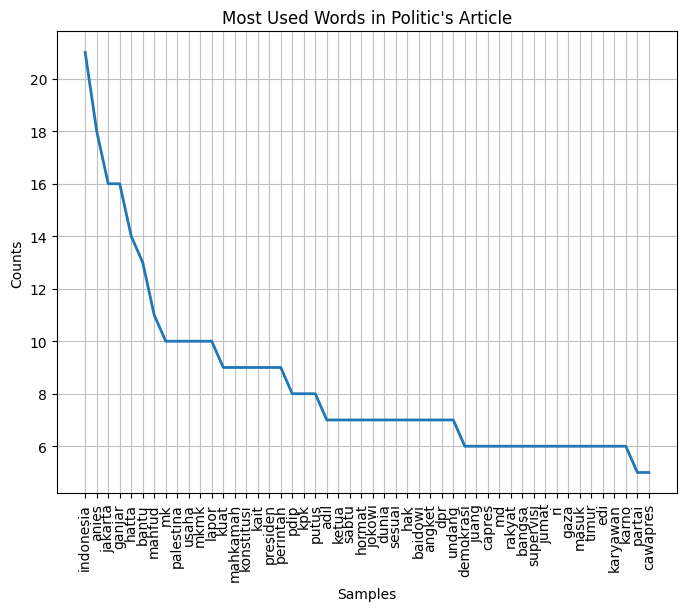

In [ ]:
politik_freq = nltk.FreqDist(word for text in df[df["jenis"] == 'politik']["clean text"] for word in text.split())
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Politic's Article")
politik_freq.plot(50)
plt.show()

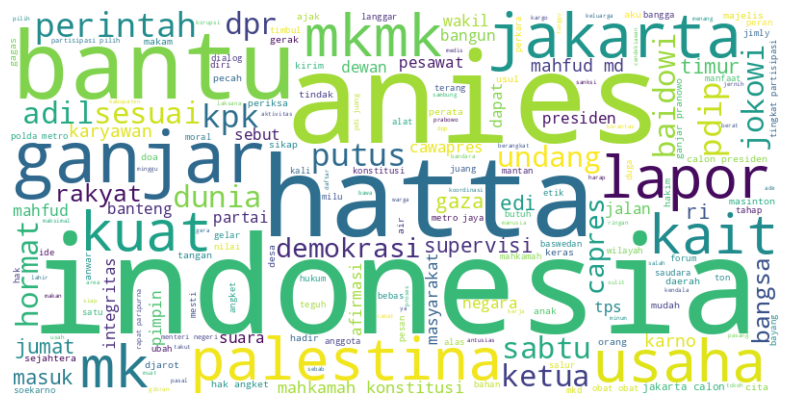

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_politik['clean text']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  # Remove the axis labels and ticks

plt.show()

Dalam teks politik, terdapat banyak istilah yang berkaitan dengan pemilihan presiden, peraturan hukum dan organisasi politik, serta isu-isu sosial. Istilah-istilah terkait pemilihan presiden sering kali mencakup figur calon presiden dan tokoh-tokoh politik, sementara dalam ranah hukum, istilah yang kerap muncul mencakup organisasi hukum. Sedangkan istilah-isu sosial yang seringkali muncul merujuk kepada lokasi terjadinya permasalahan.

Banyak kata-kata yang muncul mengenai istilah-istilah politik, dimana kata-kata tersebut memiliki implikasi terhadap bagaimana masyarakat diatur, bagaimana sumber daya didistribusikan, atau bagaimana keputusan diambil dalam sebuah negara. Lalu, banyak kata-kata yang terkait dengan konsep kekuasaan, baik dalam konteks pemerintahan, pengambilan keputusan, atau distribusi sumber daya.

Mungkin ada pembicaraan tentang bagaimana pemerintah bisa membantu masyarakat dengan integritas dan hormat, mempertimbangkan prinsip demokrasi dan keadilan dalam keputusan politik.

### Sport's Wordcloud & Sport's Freq Plot

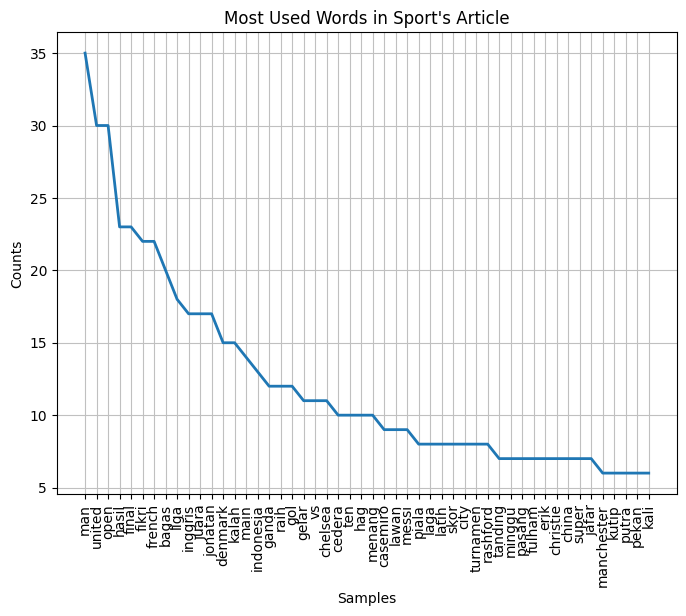

In [ ]:
olahraga_freq = nltk.FreqDist(word for text in df[df["jenis"] == 'olahraga']["clean text"] for word in text.split())
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Sport's Article")
olahraga_freq.plot(50)
plt.show()

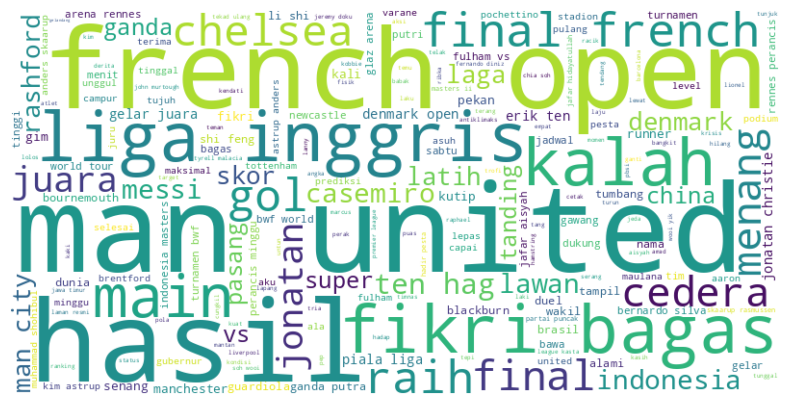

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_sport['clean text']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

Ketika kita melihat data teks yang terkait dengan olahraga, kita sering menemukan banyak kata yang mengacu pada klub dan individu yang terlibat dalam Liga Inggris, juga kata-kata yang terkait dengan turnamen bulu tangkis beserta tokoh-tokohnya. Namun, ketika kita mengekstrak dan menampilkan kata-kata yang paling sering muncul dalam sebuah word cloud, pola yang muncul menonjolkan konsep gerakan fisik, aktivitas kompetitif, dan aspek kebugaran.

Saat kata-kata ini diaplikasikan dalam kalimat atau pembicaraan yang membahas olahraga, mereka cenderung memicu respons emosional yang terkait dengan aktivitas fisik, kompetisi, dan semangat olahraga. Banyak kata-kata yang muncul dalam konteks olahraga memiliki implikasi terhadap bagaimana kompetisi olahraga, bagaimana prestasi diukur, dan bagaimana aturan diimplementasikan dalam suatu cabang olahraga. Ada pembicaraan tentang bagaimana atlet atau tim bisa mencapai prestasi, keterampilan, dan persaingan.






### Showbiz's Wordcloud & Showbiz's Freq Plot

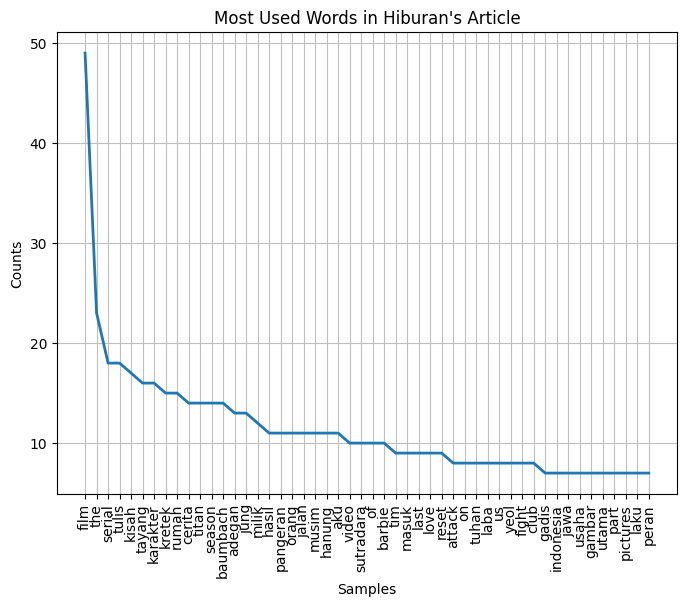

In [ ]:
hiburan_freq = nltk.FreqDist(word for text in df[df["jenis"] == 'hiburan']["clean text"] for word in text.split())
plt.subplots(figsize=(8,6))
plt.title("Most Used Words in Hiburan's Article")
hiburan_freq.plot(50)
plt.show()

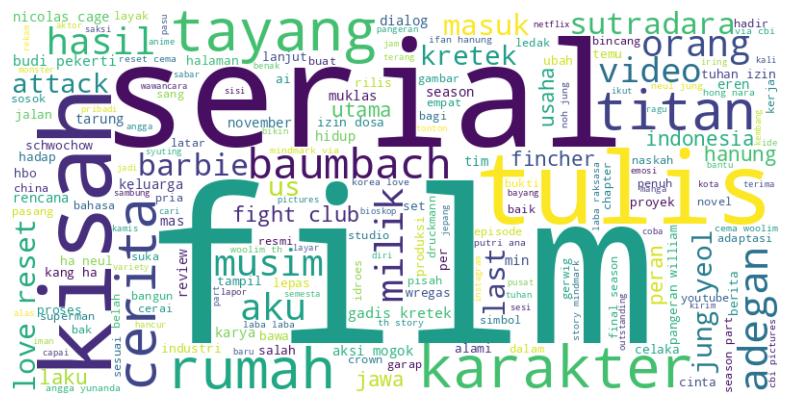

In [ ]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_hiburan['clean text']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

Kata-kata yang terkait dengan showbiz pada data text ini seringkali memiliki konotasi yang kuat terhadap industri hiburan, perfilman, dan orang yang berkaitan dengan industrinya. Data text showbiz ini memuat aspek-aspek seperti karakter, plot, produksi, orang yang berkaitan dengan industrinya, dan aspek kreatif yang umumnya terkait dengan film dan serial. Penggunaan kata-kata tersebut, terutama dalam konteks yang membahas produksi, promosi, atau ulasan film dan serial, menciptakan suasana yang khas dari industri hiburan.

Tetapi kata-kata yang berkaitan dengan showbiz karakter yang subyektif dan kontekstual. Istilah-istilah di dalamnya seringkali lebih bervariasi tidak seperti dalam teks politik dan text olahraga yang cenderung lebih terstruktur.

# Text Representation

Pada tahap text representation, untuk vectorizer saya menggunakan ```Countvectorizer``` dan ```TF-IDF```. Kedua vectorizer tersebut akan saya bandingkan hasilnya. Pada ```CountVectorizer``` hanya menghitung frekuensi kemunculan kata-kata dalam text dan tidak memberikan bobot pada kata-kata berdasarkan pentingnya relatifnya di seluruh text.

Berbeda dengan ```TF-IDF``` yang Menggabungkan dua konsep, yaitu:
  * Term Frequency (TF)
  * Inverse Document Frequency (IDF)

Dimana dengan ```TF-IDF``` dapat menghitung frekuensi kemunculan kata dalam text serta mengukur seberapa penting sebuah kata dalam seluruh koleksi text.

Dari kedua vectorizer tersebut tidak ada yang jelek atau yang bagus, tergantung pada tugas analisis teks yang kita lakukan. Tetapi, dalam melakukan klasifikasi jenis artikel seperti ini, saya perlu memperhitungkan pentingnya kata-kata relatif terhadap seluruh koleksi text untuk mengekstraksi kata-kata kunci pada setiap jenis artikel. Sehingga saya rasa bahwa ```TF-IDF``` dapat menghasilkan hasil yang lebih baik dibandingkan ```CountVectorizer```.



### Splitting Data for Train and Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['clean text'], df['jenis'],  test_size=0.3, random_state=50)

In [ ]:
print(f"shape of 'x_train': {x_train.shape}")
print(f"shape of 'x_test': {x_test.shape}")
print(f"shape of 'y_train': {y_train.shape}")
print(f"shape of 'y_test': {y_test.shape}")

shape of 'x_train': (21,)
shape of 'x_test': (9,)
shape of 'y_train': (21,)
shape of 'y_test': (9,)


Disini saya membagi data untuk train dan test menggunakan ```train_test_split()```, dimana untuk train saya menggunakan 70% dari data dan 30% data untuk test. untuk ```random_state```, saya mengisi 50. Mengapa saya mengisi ```test_size``` sebanyak 0.3 yang umumnya adalah 0.2? hal ini dikarenakan model dengan ```test_size``` sebanyak 0.3 memiliki hasil yang lebih baik dan konsisten daripada model dengan ```test_size``` sebanyak 0.2. Hal ini kemungkinan terjadi karena data yang saya punya memiliki kompleksitas dan variabilitas yang lebih, sehingga dibutuhkan ```test_size``` yang lebih banyak. Begitu juga dengan ```random_state```, ```random_state``` yang memiliki hasil yang baik adalah 50.

### Label Encoding for Target Variabel

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

Pada tahap ini saya merubah target variabel yang saya punya menjadi integer. Hal ini dilakukan karena model machine learning memerlukan variabel targetnya berbentuk angka. Saya melakukan encoding menggunakan ```label_encoder()``` dari ```sklearn.preprocessing``` untuk mengubah label kategori menjadi angka.

### Count Vectorizer

In [ ]:
vectorizer = CountVectorizer(max_features=50, min_df=3, ngram_range=(1,5))
x_train_cv = vectorizer.fit_transform(x_train)
x_test_cv = vectorizer.transform(x_test)

Pada vectorizer yang pertama, saya menggunakan ```CountVectorizer```. Pada ```CountVectorizer``` yang saya gunakan menggunakan parameter ```max_features=50```, dimana hanya menggunakan 50 fitur yang paling umum dalam proses vektorisasi. Lalu, ```min_df=3``` hanya akan mempertimbangkan kata-kata yang muncul setidaknya dalam 3 text. Dan yang terakhir adalah ```ngram_range=(1,5)```, Mencakup rentang n-gram dari 1 hingga 5. Ini berarti akan mempertimbangkan kata-kata tunggal (unigram) hingga urutan 5 kata (5-gram) sebagai fitur.

selanjutnya saya mengonversi teks di ```x_train``` menjadi representasi vektor menggunakan ```fit_transform()```, di mana setiap baris mewakili dokumen dan setiap kolom mewakili kata dalam kosakata yang dibuat oleh CountVectorizer, lalu dimasukkan ke variabel ```x_train_cv```.

Begitu juga dengan ```x_test``` yang dikonversi menjadi representasi vektor yang sama dengan yang dipelajari dari data  ```x_train``` serta dimasukkan ke variabel ```x_test_cv```.



### TF-IDF Vectorizer

In [ ]:
tfidf_vectorizer = TfidfVectorizer(max_features=50, min_df=3, ngram_range=(1,5))
x_train_tf= tfidf_vectorizer.fit_transform(x_train)
x_test_tf = tfidf_vectorizer.transform(x_test)

Pada vectorizer  pertama, saya menggunakan ```TF-IDF```.
 Di ```TF-IDF```  saya  menggunakan parameter ```max_features=50```, yang hanya menggunakan 50 fitur  paling umum selama vektorisasi.
 Maka ```min_df=3``` hanya akan mempertimbangkan kata-kata yang muncul di minimal 3 dokumen.
 Dan yang terakhir adalah ```ngram_range=(1,5)```, yang mencakup rentang n-gram dari 1 hingga 5.
 Artinya akan mempertimbangkan kata tunggal (unigram) hingga string 5 kata (5 gram ) sebagai karakteristik.
 Selanjutnya, saya mengonversi teks di ```x_train``` menjadi representasi vektor menggunakan ```fit_transform()```, di mana setiap baris mewakili dokumen dan setiap kolom mewakili kata dalam kosakata yang dihasilkan oleh ```TF-IDF``` dan dimasukan ke variabel ```x_train_tf```.
 Demikian pula, ```x_test``` dikonversi ke representasi vektor yang sama seperti yang dipelajari dari data ```x_train``` serta dimasukkan ke variabel ```x_test_tf```.



# Make Model

Model yang saya gunakan adalah ```SVM``` (Support Vector Machine) dan Random Forest seperti yang tertera pada pertanyaan. ```SVM``` dapat digunakan dalam klasifikasi teks untuk membedakan atau mengklasifikasikan artikel berdasarkan jenisnya.
Demikian pula ```Random Forest```  akan digunakan dalam klasifikasi teks untuk memprediksi kategori atau label suatu artikel berdasarkan jenisnya. Saya akan membuat 4 model yang masing-masing algoritma mempunyai 2 model yaitu 1 model untuk ```CountVectorizer``` dan 1 model untuk ```Random Forest```. Metode ```CountVectorizer``` akan mengubah teks menjadi vektor berdasarkan frekuensi kata, sedangkan model ```Random Forest``` akan menggunakan serangkaian pohon keputusan untuk mengklasifikasikan artikel. Kombinasi ini memberikan keragaman metode pemrosesan teks dan model klasifikasi, sehingga efektivitas model dapat dieksplorasi untuk representasi vektor teks yang berbeda. Setiap algoritma memiliki karakteristiknya masing-masing:
* ```SVM``` berfokus pada pencarian kelas pemisah hyperplane terbaik.
* ```Random Forest``` menggunakan beberapa pohon keputusan gabungan untuk prediksi.

Dengan setiap algoritma diuji menggunakan dua representasi data yang berbeda, saya berharap dapat memahami bagaimana performa model bervariasi bergantung pada pendekatan representasi teks yang digunakan.

### SVM's Algorithm

In [ ]:
svm = SVC()

svm.fit(x_train_cv, y_train)
svm_predictions_cv = svm.predict(x_test_cv)
svm_accuracy_cv = accuracy_score(y_test, svm_predictions_cv)

svm.fit(x_train_tf, y_train)
svm_predictions_tf = svm.predict(x_test_tf)
svm_accuracy_tf = accuracy_score(y_test, svm_predictions_tf)

Pertama, model SVM diinisialisasi menggunakan kelas ```SVC()``` dari library ```scikit-learn```. Dua pendekatan berbeda digunakan untuk merepresentasikan teks. Model ```SVM``` dilatih dengan train data yang diproses dengan ```CountVectorizer``` yang sudah dilakuakan pada Text Representation, yaitu ```x_train_cv``` dan ```y_train``` yang sudah di ```Label Encoding```. Kemudian model yang  digunakan untuk membuat prediksi menggunakan ```x_test_cv``` yang juga sudah diubah menjadi representasi ```CountVectorizer``` pada ```Text Representation```. Evaluasi kemudian dilakukan dengan menghitung akurasi model ```SVM``` pada data uji coba yang  diolah dengan ```CountVectorizer```, menggunakan indeks akurasi ```accuracy_score()```. Langkah yang sama diulangi untuk representasi ```TfidfVectorizer```. Model ```SVM``` ditrain dengan train data yang dikonversi oleh ```TfidfVectorizer``` yaitu ```x_train_tf``` dan labelnya ```y_train``` yang sudah di ```Label Encoding```. Prediksi yang dibuat pada  ```x_test_tf``` yang sudah juga dikonversi oleh ```TfidfVectorizer```. Lalu evaluasi dilakukam dengan indeks akurasi ```accuracy_score()``` juga.



### Random Forest's Algorithm

In [ ]:
rf = RandomForestClassifier(random_state=45)

rf.fit(x_train_cv, y_train)
rf_predictions_cv = rf.predict(x_test_cv)
rf_accuracy_cv = accuracy_score(y_test, rf_predictions_cv)

rf.fit(x_train_tf, y_train)
rf_predictions_tf = rf.predict(x_test_tf)
rf_accuracy_tf = accuracy_score(y_test, rf_predictions_tf)

Model Random Forest diawali dengan inisialisasi menggunakan kelas ```RandomForestClassifier()``` dari library ```scikit-learn```. Ada dua pendekatan yang dipakai untuk mewakili teks. Model tersebut dilatih dengan train data yang telah diproses menggunakan ```CountVectorizer``` yaitu ```x_train_cv``` dan label yang sudah di label encoding yaitu ```y_train```. Setelah itu, model di testing dengan ```x_test_cv``` yang juga sudah diubah menjadi representasi ```CountVectorizer```. Untuk mengevaluasi, akurasi model ```Random Forest``` pada ```x_test_cv``` yang sudah diolah dengan ```CountVectorizer``` dihitung menggunakan fungsi ```accuracy_score()```. Proses serupa dilakukan untuk representasi ```TfidfVectorizer```. Model ```Random Forest``` dijalani menggunakan ```x_train_tf``` yang diubah oleh ```TfidfVectorizer``` serta ```y_train``` yang sudah di ```label encoding```. Prediksi dibuat untuk ```x_test_tf``` yang juga telah diubah menggunakan ```TfidfVectorizer```. Kemudian, evaluasi dilakukan menggunakan fungsi ```accuracy_score()``` pada hasil prediksi tersebut.

# Result from The Models

Pada bagian result, evaluasi performa model ```SVM``` dan ```Random Forest``` dalam klasifikasi teks dilakukan. Melibatkan ```classification report```, ```accuracy score```, dan ```cross-validation``` untuk memahami performa keduanya. dengan ```classification report``` kita mendapatkan ringkasan yang menyajikan metrik evaluasi seperti ```precicsion```, ```recall```, ```accuracy```, dan ```F1-score``` untuk setiap kelas yang ada dalam data. Untuk mengukur kinerja kedua model tersebut saya menggunakan ```cross-validation```.

### Classification Report & Accuracy Models

In [ ]:
svm_classification_report_cv = classification_report(y_test, svm_predictions_cv)
svm_classification_report_tf = classification_report(y_test, svm_predictions_tf)

rf_classification_report_cv = classification_report(y_test, rf_predictions_cv)
rf_classification_report_tf = classification_report(y_test, rf_predictions_tf)

print("Hasil SVM (TF-IDF):")
print(f"Akurasi: {svm_accuracy_tf:.2f}")
print("Laporan Klasifikasi SVM:")
print(svm_classification_report_tf)

print("Hasil SVM (CV):")
print(f"Akurasi: {svm_accuracy_cv:.2f}")
print("Laporan Klasifikasi SVM:")
print(svm_classification_report_cv)

print("Hasil RF (TF-IDF):")
print(f"Akurasi: {rf_accuracy_tf:.2f}")
print("Laporan Klasifikasi rf:")
print(rf_classification_report_tf)

print("Hasil RF (CV):")
print(f"Akurasi: {rf_accuracy_cv:.2f}")
print("Laporan Klasifikasi rf:")
print(rf_classification_report_cv)

Hasil SVM (TF-IDF):
Akurasi: 0.67
Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      0.67      0.80         3
           2       0.40      1.00      0.57         2

    accuracy                           0.67         9
   macro avg       0.80      0.72      0.68         9
weighted avg       0.87      0.67      0.69         9

Hasil SVM (CV):
Akurasi: 0.56
Laporan Klasifikasi SVM:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       1.00      0.67      0.80         3
           2       0.33      1.00      0.50         2

    accuracy                           0.56         9
   macro avg       0.78      0.64      0.57         9
weighted avg       0.85      0.56      0.56         9

Hasil RF (TF-IDF):
Akurasi: 0.78
Laporan Klasifikasi rf:
              precision    recall  f1-score   support

           0

### Accuracy Plot

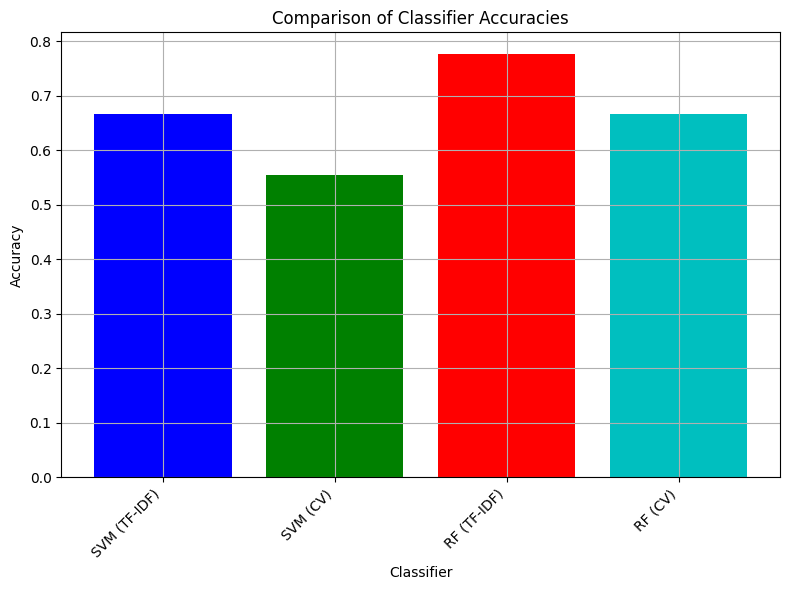

In [ ]:
classifiers = ['SVM (TF-IDF)', 'SVM (CV)', 'RF (TF-IDF)', 'RF (CV)']
accuracies = [svm_accuracy_tf, svm_accuracy_cv, rf_accuracy_tf, rf_accuracy_cv]

plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracies, color=['b', 'g', 'r', 'c'])
plt.title('Comparison of Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.grid(True)

plt.tight_layout()
plt.show()

* Model **SVM (TF-IDF)** memiliki akurasi **67%**. Untuk kelas 0, **precision** dan **recall** masing-masing 1.00 dan 0.50. Untuk kelas 1, **precision** dan **recall** masing-masing 1.00 dan 0.67. Sedangkan kelas 2 memiliki **precision** 0.40 dan **recall** 1.00.
*  Model **SVM (CV)** memiliki akurasi **56%**. Untuk kelas 0, **precision** 1.00 dan **recall** 0.25. Untuk kelas 1, **precision** 1.00 dan **recall** 0.67. Kelas 2 memiliki **precision** 0.33 dan **recall** 1.00.
* Model **RF (TF-IDF)** memiliki akurasi **78%**. Untuk kelas 0, **precision** dan **recall** masing-masing 1.00 dan 0.75. Untuk kelas 1, **precision** 1.00 dan **recall** 0.67. Sedangkan kelas 2 memiliki **precision** 0.50 dan **recall** 1.00.
* Model **RF (CV)** memiliki akurasi **67%**. Untuk kelas 0, **precision** 1.00 dan **recall** 0.50. Untuk kelas 1, **precision** 1.00 dan **recall** 0.67. Kelas 2 memiliki **precision** 0.40 dan **recall** 1.00.

Meskipun ```Random Forest``` pada ```TF-IDF``` memiliki akurasi yang tinggi, terdapat kekurangan dalam mengenali sebagian besar sampel yang seharusnya termasuk dalam kelas 1. Hal ini menunjukkan bahwa walaupun memiliki precision yang baik, model ini masih kurang dalam mengidentifikasi sebagian besar sampel yang sesungguhnya termasuk dalam kelas tersebut.

Di sisi lain, model ```SVM``` pada ```TF-IDF``` menunjukkan precision yang tinggi untuk kelas 0 dan 1, namun mengalami kesulitan dalam mengidentifikasi dengan benar semua sampel yang seharusnya termasuk dalam kelas 2.

Sementara itu, baik ```Random Forest``` pada ```CountVectorizer``` maupun ```SVM``` pada ```TF-IDF``` mengalami kesulitan yang serupa, yaitu dalam mengidentifikasi sebagian besar sampel dari kelas 2. Hal ini menunjukkan tantangan dalam mengenali dengan tepat sampel-sampel yang seharusnya termasuk dalam kategori tersebut pada kedua model tersebut.

Kelas 2 yang notabene adalah jenis hiburan, dimana kedua model tersebut kesulitan dalam mengkklasifikasikan kelas ini. Hal ini dikarenakan data hiburan mungkin sulit diidentifikasi karena sifatnya yang subjektif dan terkadang tidak terstruktur, serta data hiburan juga memiliki komponen kreatif yang sulit diukur dengan metrik yang kaku. Berbeda dengan data politik atau olahraga, yang memiliki data yang lebih terukur.

### Cross-Validation Plot

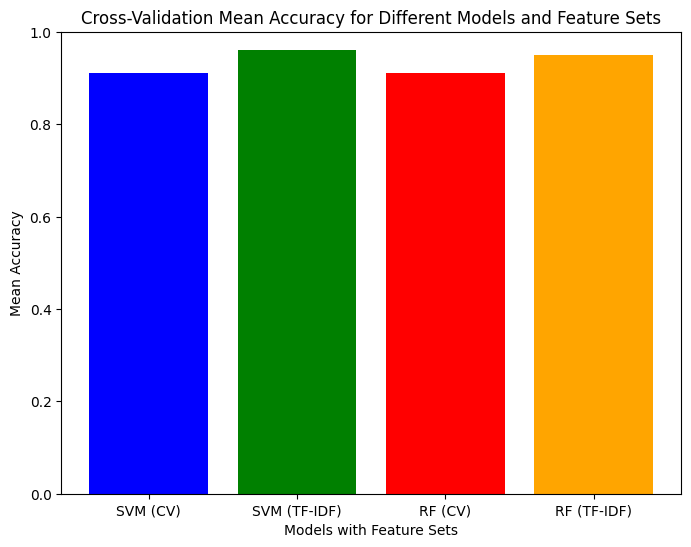

SVM Cross-Validation Mean Accuracy (CountVectorizer): 0.9099999999999999
SVM Cross-Validation Mean Accuracy (TF-IDF): 0.96
RF Cross-Validation Mean Accuracy (CountVectorizer): 0.9099999999999999
RF Cross-Validation Mean Accuracy (TF-IDF): 0.95


In [ ]:
svm_cv_scores = cross_val_score(svm, x_train_cv, y_train, cv=5)
svm_cv_mean_accuracy = svm_cv_scores.mean()

svm_tf_scores = cross_val_score(svm, x_train_tf, y_train, cv=5)
svm_tf_mean_accuracy = svm_tf_scores.mean()

rf_cv_scores = cross_val_score(rf, x_train_cv, y_train, cv=5)
rf_cv_mean_accuracy = rf_cv_scores.mean()

rf_tf_scores = cross_val_score(rf, x_train_tf, y_train, cv=5)
rf_tf_mean_accuracy = rf_tf_scores.mean()

models = ['SVM (CV)', 'SVM (TF-IDF)', 'RF (CV)', 'RF (TF-IDF)']
mean_accuracies = [svm_cv_mean_accuracy, svm_tf_mean_accuracy, rf_cv_mean_accuracy, rf_tf_mean_accuracy]

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(models, mean_accuracies, color=['blue', 'green', 'red', 'orange'])
plt.xlabel('Models with Feature Sets')
plt.ylabel('Mean Accuracy')
plt.title('Cross-Validation Mean Accuracy for Different Models and Feature Sets')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 (0% to 100%)
plt.show()

print("SVM Cross-Validation Mean Accuracy (CountVectorizer):", svm_cv_mean_accuracy)
print("SVM Cross-Validation Mean Accuracy (TF-IDF):", svm_tf_mean_accuracy)
print("RF Cross-Validation Mean Accuracy (CountVectorizer):", rf_cv_mean_accuracy)
print("RF Cross-Validation Mean Accuracy (TF-IDF):", rf_tf_mean_accuracy)

* Untuk **CountVectorizer**, rata-rata akurasi model **SVM** dari Cross-Validation adalah **0.90**.
* Sedangkan untuk **TF-IDF**, rata-rata akurasi model **SVM** dari Cross-Validation adalah **0.96**.
* Pada **CountVectorizer**, rata-rata akurasi model **Random Forest** dari Cross-Validation adalah **0.90**.
* Sementara pada **TF-IDF**, rata-rata akurasi model **Random Forest** dari Cross-Validation adalah **0.95**.

Vectorizer ```CountVectorizer``` dan ```TF-IDF``` memiliki dampak signifikan terhadap performa model. ```TF-IDF``` cenderung memberikan hasil vektor yang lebih baik daripada ```CountVectorizer``` ketika memperhitungkan bobot kata dalam text. Hal ini menunjukkan bahwa pemilihan vectorizer dapat memberikan perbedaan kinerja yang signifikan dibandingkan dengan model klasifikasi.



# Explanation

Pada hasil dari ```classification report``` dan ```cross-validation``` dari kedua model tersebut menunjukkan bahwa model ```random forest``` lebih baik dari ```SVM```. Hal ini bisa disebabkan karena ```random forest``` dapat bekerja dengan baik dalam kasus data ini, dimana hubungan antara fitur dan target tidak linear atau lebih kompleks. Pada data ini juga, ```random forest```  dapat memberikan generalisasi yang lebih baik pada data yang belum pernah dilihat sebelumnya.

```TF-IDF``` cenderung memberikan informasi yang lebih relevan dan membantu dalam membedakan dan mengklasifikasikan jenis-jenis artikel secara lebih baik daripada ```CountVectorizer```. Hal ini dikarenakan ```TF-IDF``` memberikan bobot yang lebih baik pada kata-kata yang mungkin lebih bermakna dalam membedakan jenis artikel. Ini karena metode ini menekankan kata-kata yang unik untuk setiap kategori, membantu model untuk memahami perbedaan antar kategori. Keterbatasan dari ```CountVectorizer``` yang membuat hasilnya lebih buruk daripada ```TF-IDF```, hal ini dikarenakan ```CountVectorizer``` tidak memberikan informasi tentang seberapa pentingnya kata-kata dalam konteks khusus kategori artikel.